In [5]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_conv
import plot_conv_sub

import xarray as xr
import pandas as pd

In [2]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_3_mask3d_ccc_subsurf.bin_1_211",
                            expvar_space='y')

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_3_mask3d_ccc_subsurf.bin_1_211

Reading /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_3_mask3d_ccc_subsurf.bin_1_211

Reading Convolution Tool output ... 
<_io.BufferedReader name='/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_3_mask3d_ccc_subsurf.bin_1_211/output/recon1d_empmr.data'>
<_io.BufferedReader name='/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_3_mask3d_ccc_subsurf.bin_1_211/output/recon1d_pload.data'>
<_io.BufferedReader name='/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_3_mask3d_ccc_subsurf.bin_1_211/output/recon1d_qnet.data'>
<_io.BufferedReader name='/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_3_mask3d_ccc_subsurf.bin_1_211/output/recon1d_qsw.data'>
<_io.BufferedReader name='/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_156_156_

In [3]:
return_vars_dict = globals_dict.get('return_vars')
hfacc = globals_dict.get('emu').hfacc

ww = return_vars_dict['time_values']
recon1d_sum = return_vars_dict['recon1d_sum_all_ctrl_vs_lag_time']
wwmin = return_vars_dict['time_values_min']
wwmax = return_vars_dict['time_values_max']
nctrl = return_vars_dict['num_ctrl']
recon1d = return_vars_dict['recon1d_vs_lag_time']
fctrl = return_vars_dict['ctrl_name']
tlag = return_vars_dict['lag_in_weeks']
ev_lag = return_vars_dict['expvar_vs_lag']
tctrl = return_vars_dict['ctrl_idx']
ev_ctrl = return_vars_dict['expvar_vs_ctrl']
nlag = return_vars_dict['num_lag_in_weeks']
tctrl_min = return_vars_dict['ctrl_idx_min']
tctrl_max = return_vars_dict['ctrl_idx_max']
ev_space = return_vars_dict['expvar_vs_space']

In [4]:
import xarray as xr

# Load grid 
ecco_grid = xr.open_dataset('/efs_ecco/ECCO/V4/r4/ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
ecco_grid.load()

# Get the model grid longitude and latitude
XC = ecco_grid.XC.values # modle grid longitude (13x90x90) 
YC = ecco_grid.YC.values # latitudes
# Also grid cell areaa in (m^2)
rA = ecco_grid.rA.values
maskC = ecco_grid.maskC.values # 3d mask (0/1) for model grid (tracer point)
maskCSurf = maskC[0] # maskC at surface level (level = 1)
hFacC = ecco_grid.hFacC.values # 3d non-dim factors (0-1) reflecing model cell geometry in vertical direction. Partial cells have values >0 but <1.
Zl = ecco_grid.Zl.values # depth of vertical cell face: between 0 and -5678 meters
Z  = ecco_grid.Z.values # depth of vertical cell ceter: between -10 and -5906 meters
drF = ecco_grid.drF.values # layer thickness (m); 1d with 50 elements

# More fields for the western and southern faces of grid cells. U is on the west face and V is on the southern face.
# They are the same as the fields above (C for tracer points at the center of grid cells).
# We need these fields for creating transport masks
maskW = ecco_grid.maskW.values # 3d mask (0/1) for model grid (U point)
maskWSurf = maskW[0] # maskW at surface level (level = 1)
hFacW = ecco_grid.hFacW.values 

maskS = ecco_grid.maskS.values # 3d mask (0/1) for model grid (V point)
maskSSurf = maskS[0] # maskS at surface level (level = 1)
hFacS = ecco_grid.hFacS.values 

# dxG and dyG are the horizontal grid spacing (meters) for the western and southern faces, respectively.
dxG = ecco_grid.dxG.values
dyG = ecco_grid.dyG.values


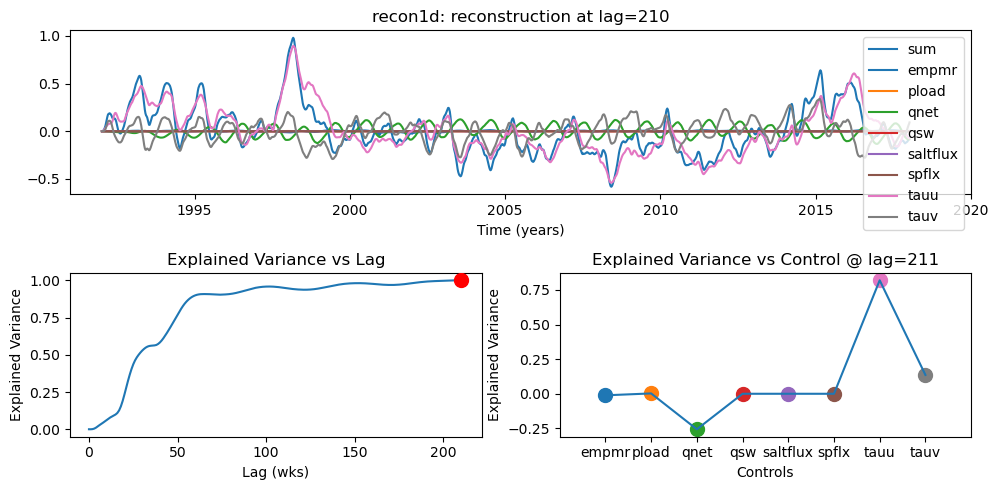

In [6]:

# Set up parameters for plots
ip = 210 # lag
frun = '/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_adj_156_156_3_mask3d_ccc_subsurf.bin_1'
ic = 7 # for adxx_tauv
dscale = 1e12 # scaling factor
# Apply the scaling factor and mask out the land points
masked_dumg = dscale*lib_python.nat2globe(ev_space[ic-1,:])
dummskg = lib_python.nat2globe(hfacc[0])
masked_dumg[dummskg==0]=np.nan

cmap = plt.cm.jet
cmap.set_bad(color='gray')  # Set the color for masked elements to gray

# Line plots
plot_conv.plot_conv_lin(ip, ww, recon1d_sum, wwmin, wwmax, 
                        nctrl, recon1d, fctrl,
                        tlag, ev_lag,
                        tctrl, ev_ctrl, nlag, tctrl_min, tctrl_max)


llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32


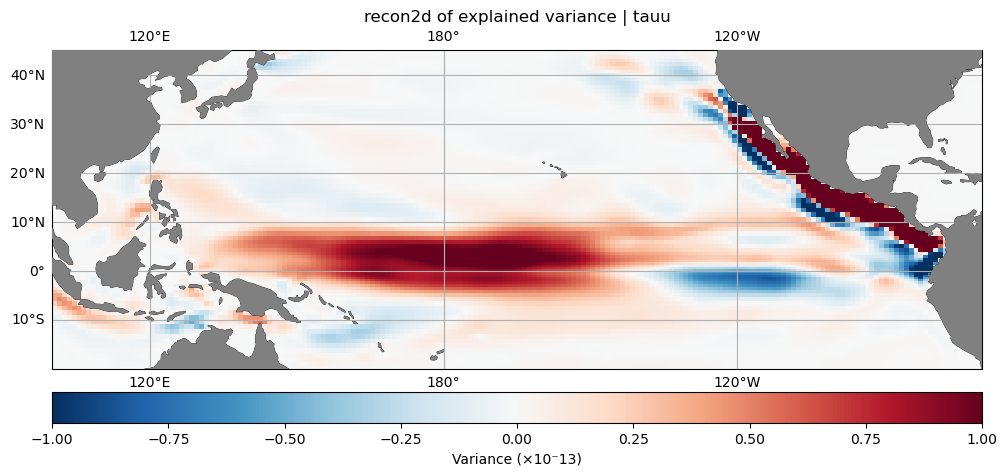

In [7]:
from os.path import join,expanduser
import sys

user_home_dir = expanduser('~')
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure and axis
fig = plt.figure(figsize=(12, 6))
projection = ccrs.PlateCarree(central_longitude=180)  # Pacific-centered view
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Convert and scale data
dscale = 1e13 # scaling factor
ev_space_plt = ecco.llc_compact_to_tiles(ev_space[ic-1,:])*dscale

cf = None
for t in range(13):
    cf = ax.pcolormesh(XC[t], YC[t], ev_space_plt[t],
                       vmin=-1, vmax=1, cmap='RdBu_r', transform=ccrs.PlateCarree())

# Set map extent: [west_lon, east_lon, south_lat, north_lat]
# Adjust as needed for Pacific region
ax.set_extent([100, -70 + 360, -20, 45], crs=ccrs.PlateCarree())  # ~Pacific Basin

# Add features
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=10)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.gridlines(draw_labels=True)
ax.set_title('recon2d of explained variance | tauu')

# Add colorbar
cbar = fig.colorbar(cf, orientation='horizontal', pad=0.05, aspect=30)
cbar.set_label('Variance (×10⁻13)')
outpath = f'/efs_ecco/ywu/recon2d_explained_variance_tauu.png'
plt.savefig(outpath, dpi=500, bbox_inches='tight')
# plt.show()


In [43]:
# Reconstruction: equatorial Pacific + California coast # 
data_name = ['recon2d_empmr.data',
             'recon2d_pload.data', 
             'recon2d_qnet.data',
             'recon2d_qsw.data',
             'recon2d_saltflux.data',
             'recon2d_spflx.data',
             'recon2d_tauu.data', 
             'recon2d_tauv.data']
recon1d_reg = np.zeros([len(data_name),1357])

for i in range(len(data_name)): 
    data = ecco.read_llc_to_tiles(input_dir, data_name[i], nl = 1357)
    for t in range(1357): 
        recon1d_reg[i,t] = np.nansum(data[t,0,:,:,:] * mask_tmpplot_pac)

load_binary_array: loading file /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_276_276_3_mask3d_ccc_subsurf.bin_1_20250527_001743_20/output/recon2d_empmr.data
load_binary_array: data array shape  (1357, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1357, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (1357, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
load_binary_array: loading file /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_276_276_3_mask3d_ccc_subsurf.bin_1_20250527_001743_20/output/recon2d_pload.data
load_binary_array: data array shape  (1357, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1357, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (1357, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
load_binary_array: loading file /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_conv_276_27

In [8]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_samp_m_3_mask3d_ccc_subsurf.bin_1")

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_samp_m_3_mask3d_ccc_subsurf.bin_1

Reading /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_samp_m_3_mask3d_ccc_subsurf.bin_1

Reading Sampling Tool output ... 

*********************************************
Read variables
   smp: temporal anomaly of sampled variable
   smp_mn: reference time-mean of sampled variable
from file /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_samp_m_3_mask3d_ccc_subsurf.bin_1/output/samp.out_312

*********************************************
Read variable
   smp_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_samp_m_3_mask3d_ccc_subsurf.bin_1/output/samp.step_312

Plotting sampled time-series ... 

***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
*********************

In [9]:
return_vars_dict = globals_dict.get('return_vars')
samp_t = return_vars_dict['time_values']
samp_v = return_vars_dict['variable']
frun_file = return_vars_dict['samp_path']

/tmp/ipykernel_62/2183323696.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


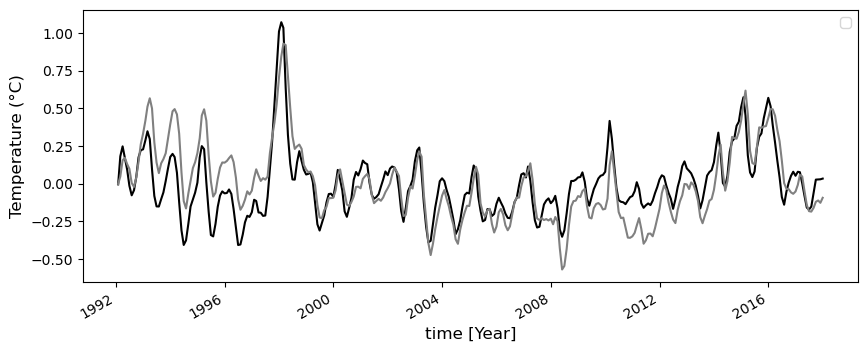

In [12]:
import xarray as xr
import pandas as pd

# Your data
weekly_data = recon1d_sum[-1,:] #np.sum(recon1d_sum, axis = 0)  # shape (1357,)

# Create a time coordinate (example: starting from 2000-01-01)
time = pd.date_range(start='1992-01-01', periods=len(weekly_data), freq='W')

# Create DataArray
da = xr.DataArray(weekly_data, coords=[time], dims=["time"])
tt = pd.date_range(start='1992-01-01', periods=312, freq='ME')

monthly_da = da.resample(time='ME').mean()

# Plot
plt.figure(figsize=(10, 4))  # set figure size
# sampling from control
plt.plot(tt,samp_v-np.mean(samp_v),'k')
# global reconstruction from forcing tauu
plt.plot(tt,monthly_da-monthly_da.mean(),'grey') 

# Axis labels
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xlabel("time [Year]", fontsize=12)

# Format x-axis to show years
plt.gcf().autofmt_xdate()  # auto-format date labels
# plt.xticks(rotation=45)
# plt.grid(True)
plt.legend()
outpath = f'/efs_ecco/ywu/recon1d_theta_subsurf_2004.png'
plt.savefig(outpath, dpi=500, bbox_inches='tight')
